In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score

In [13]:
dat = pd.read_csv(r'C:\Users\mohir\OneDrive\Desktop\New folder\dataset\heart_failure.csv');

In [14]:
dat.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [15]:
X = dat.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11]]
y = dat.DEATH_EVENT.values

In [16]:
#Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(X)

In [17]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 30)

In [18]:
# Applying PCA
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 11)
# pca = PCA(0.9)
X_train = kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)

In [19]:
#Training the logistic regression model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=30)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=30)

In [20]:
#Prediction part
y_pred = classifier.predict(X_test)

[[26 13]
 [ 4 17]]


<Axes: >

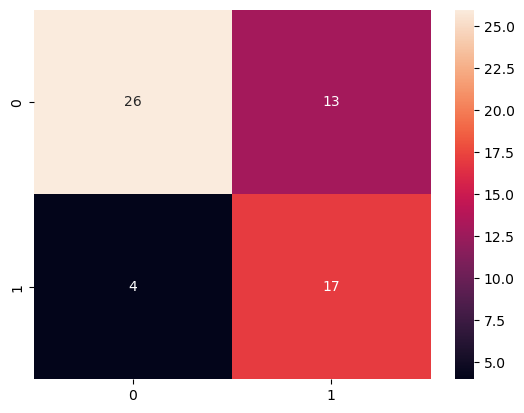

In [21]:
#Making a confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

sns.heatmap(cm, annot=True)



In [22]:
print('Accuracy: ' +str(accuracy_score(y_test, y_pred)))

Accuracy: 0.7166666666666667
